CHATER NAJOUA
BENSALIH EL HASSAN
MASTER :BDSAS

Problème de Data Mining : Prédiction du Risque de Maladies Cardiaques

Objectif : Développer un modèle de machine learning capable de prédire le risque de maladies cardiaques chez un individu en            fonction de ses caractéristiques médicales et démographiques.

Les attributs de data set

Âge (Age) : L'âge du patient en années.

Sexe (Sex) : Le sexe du patient, où 1 peut représenter un homme et 0 peut représenter une femme.

Angine Induite par l'Exercice (exang) : Un indicateur de l'angine induite par l'exercice, où 1 indique la présence et 0 l'absence.

Nombre de Gros Vaisseaux (ca) : Le nombre de gros vaisseaux sanguins colorés par une substance opaque, où la valeur peut varier de 0 à 3.

Type de Douleur Thoracique (cp) : Le type de douleur thoracique ressentie par le patient, avec quatre valeurs possibles :

1 : Angine typique
2 : Angine atypique
3 : Douleur thoracique non angineuse
4 : Asymptomatique
Tension Artérielle au Repos (trtbps) : La pression artérielle du patient au repos, mesurée en mm Hg (millimètres de mercure).

Cholestérol (chol) : Le taux de cholestérol du patient en mg/dl (milligrammes par décilitre), mesuré via un capteur BMI (Indice de Masse Corporelle).

Sucre dans le Sang à Jeun (fbs) : Un indicateur de la glycémie à jeun, où 1 indique une valeur supérieure à 120 mg/dl et 0 une valeur inférieure ou égale à 120 mg/dl.

Électrocardiogramme au Repos (rest_ecg) : Les résultats de l'électrocardiogramme au repos, avec trois valeurs possibles :

0 : Normal
1 : Anomalie de l'onde ST-T (inversions de l'onde T et/ou élévation ou dépression de l'onde ST de plus de 0,05 mV)
2 : Hypertrophie ventriculaire gauche probable ou définitive selon les critères d'Estes.
Fréquence Cardiaque Maximale Atteinte (thalach) : La fréquence cardiaque maximale atteinte par le patient.

Cible (target) : La cible de prédiction, où 1 indique une probabilité plus élevée d'attaque cardiaque et 0 une probabilité moins élevée.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dtreeviz
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV,KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier,StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.neural_network import MLPClassifier
#from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score,classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier

✨**I- Analyse exploratoire des données:  

**Charger les données dans Pandas Frame

In [2]:
data=pd.read_csv("C:/Users/Pc/Desktop/Master/S2/data_mining/heart.csv")

In [3]:
data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Variable Identification: 

In [5]:
# Définir une fonction pour déterminer le type de variable
def determine_variable_types(df, threshold=10):
    types = {}
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            # Si une colonne numérique a peu de valeurs uniques, on la considère comme catégorielle
            if df[column].nunique() <= threshold:
                types[column] = 'categorical'
            else:
                types[column] = 'numerical'
        else:
            types[column] = 'categorical'
    return types

# Appliquer la fonction sur le dataframe
column_types = determine_variable_types(data)

# Définir les rôles des variables
roles = ['input' if col != 'output' else 'output' for col in data.columns]

# Créer un dataframe pour afficher les informations
variable_info = pd.DataFrame({
    'Variable': data.columns,
    'Type': [column_types[col] for col in data.columns],
    'Role': roles
})

print(variable_info)


    Variable         Type    Role
0        age    numerical   input
1        sex  categorical   input
2         cp  categorical   input
3     trtbps    numerical   input
4       chol    numerical   input
5        fbs  categorical   input
6    restecg  categorical   input
7   thalachh    numerical   input
8       exng  categorical   input
9    oldpeak    numerical   input
10       slp  categorical   input
11       caa  categorical   input
12     thall  categorical   input
13    output  categorical  output


**Statistiques sur chaque attribut numérique (mean, quartile, min, max, …)

In [7]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Analyse univariée:

1)- Pour les variables numériques :

In [8]:
# Sélectionner uniquement les colonnes numériques
numerical_variables =variable_info[variable_info['Type'] == 'numerical']['Variable']


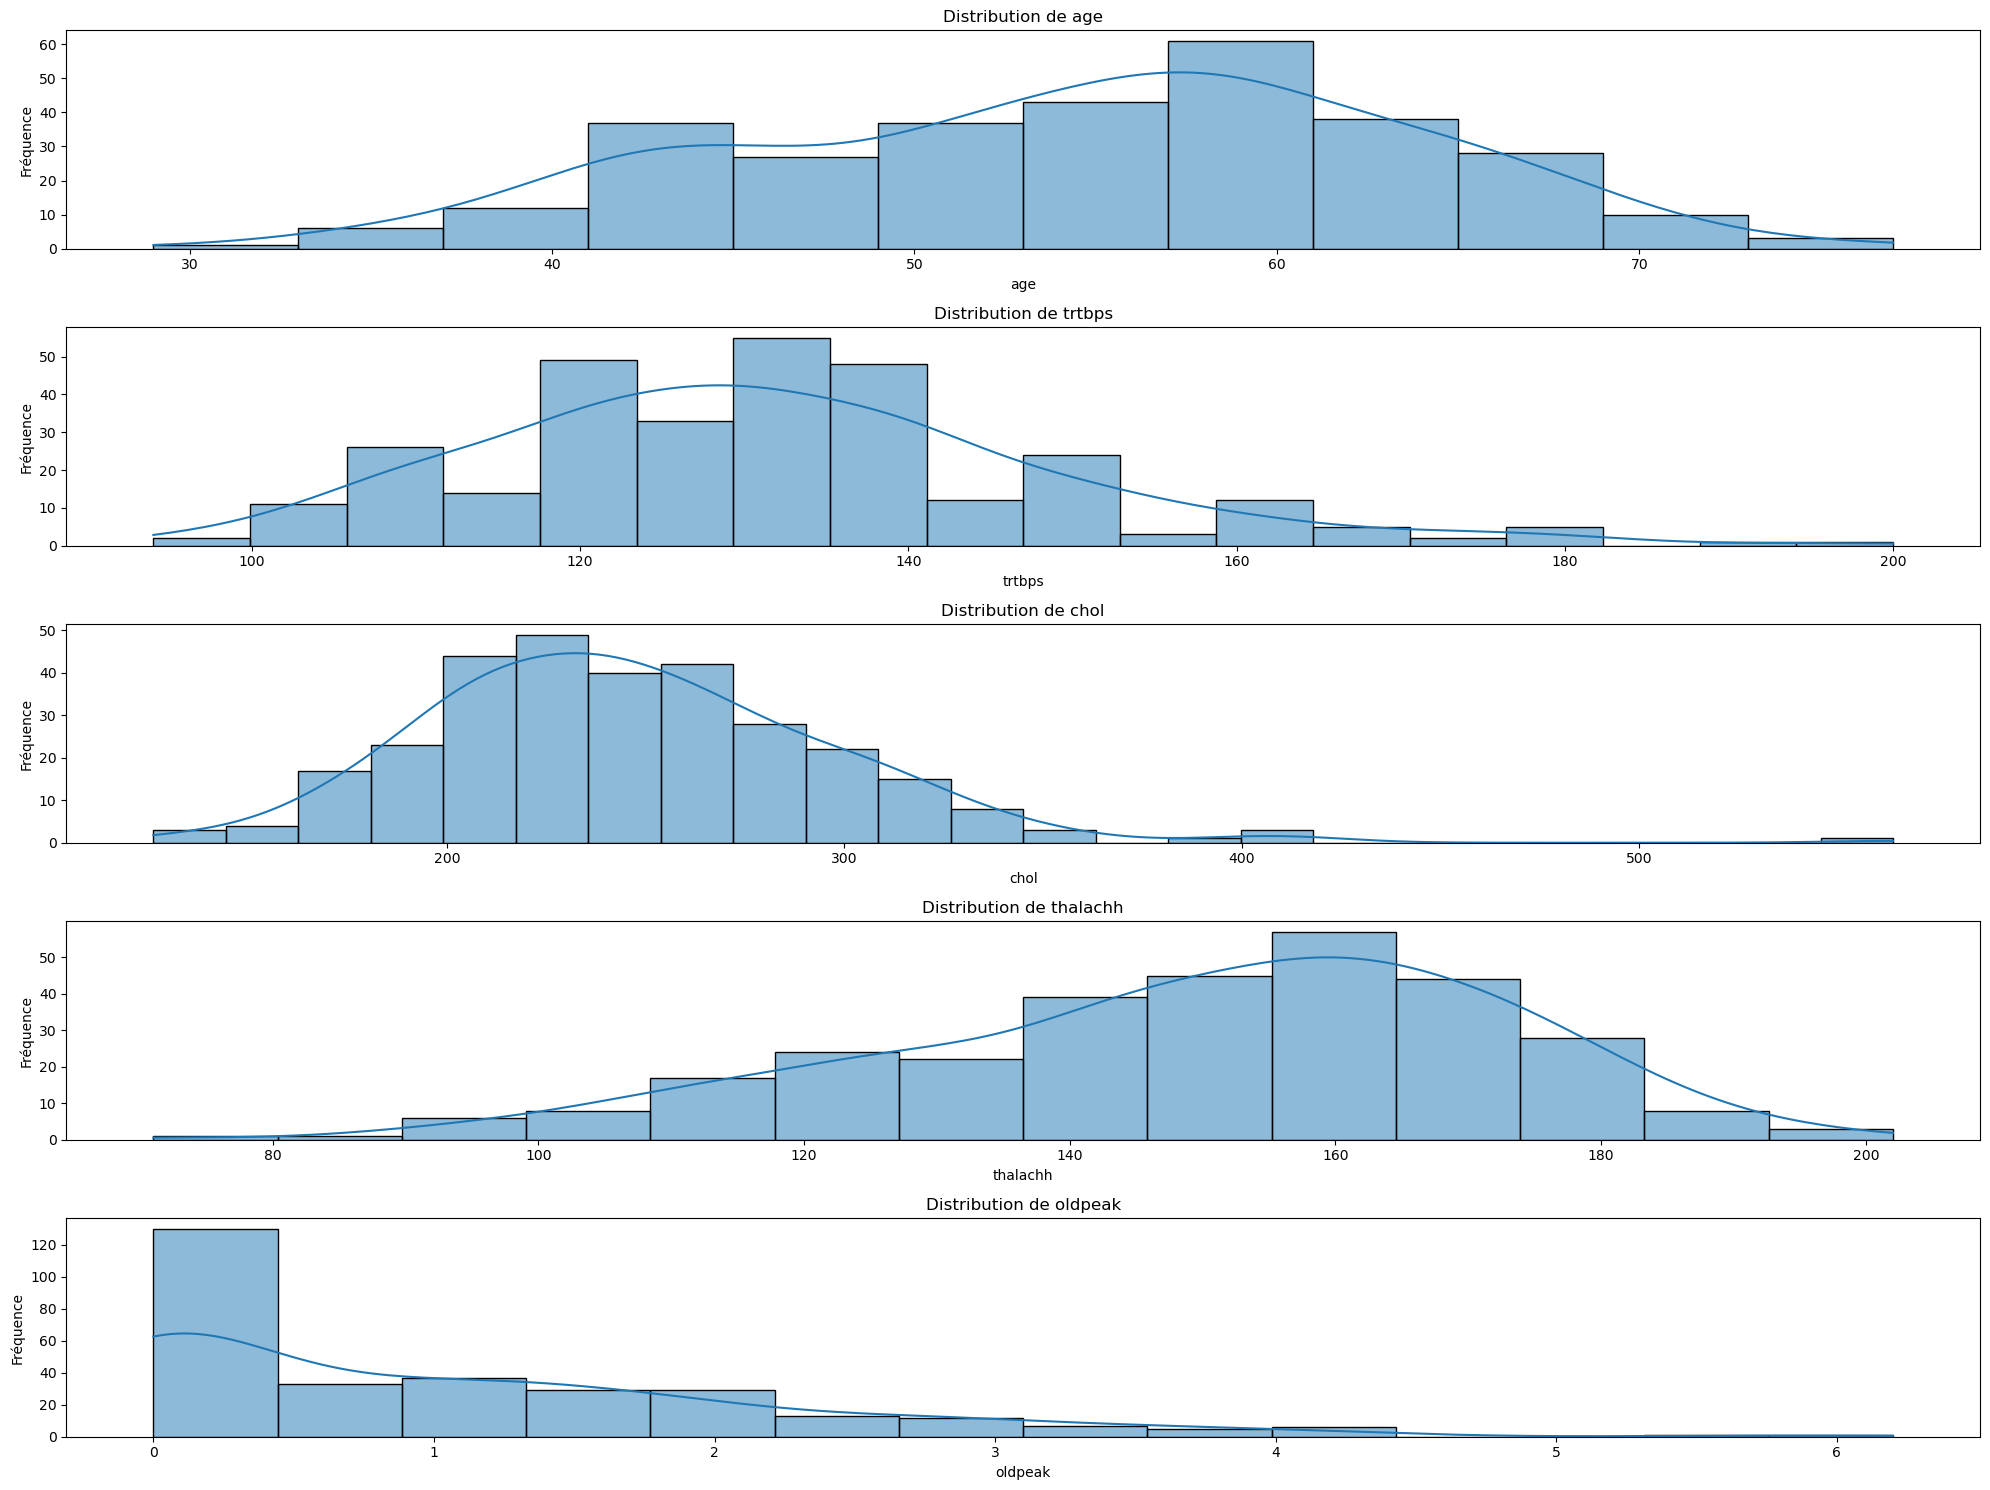

In [9]:
# Définir la taille de la figure
plt.figure(figsize=(20, 15))

# Itérer sur chaque variable numérique et créer un histogramme
for i, column in enumerate(numerical_variables, 1):
    plt.subplot(len(numerical_variables), 1, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')

# Ajuster la disposition
plt.tight_layout()

# Afficher le graphique
plt.show()

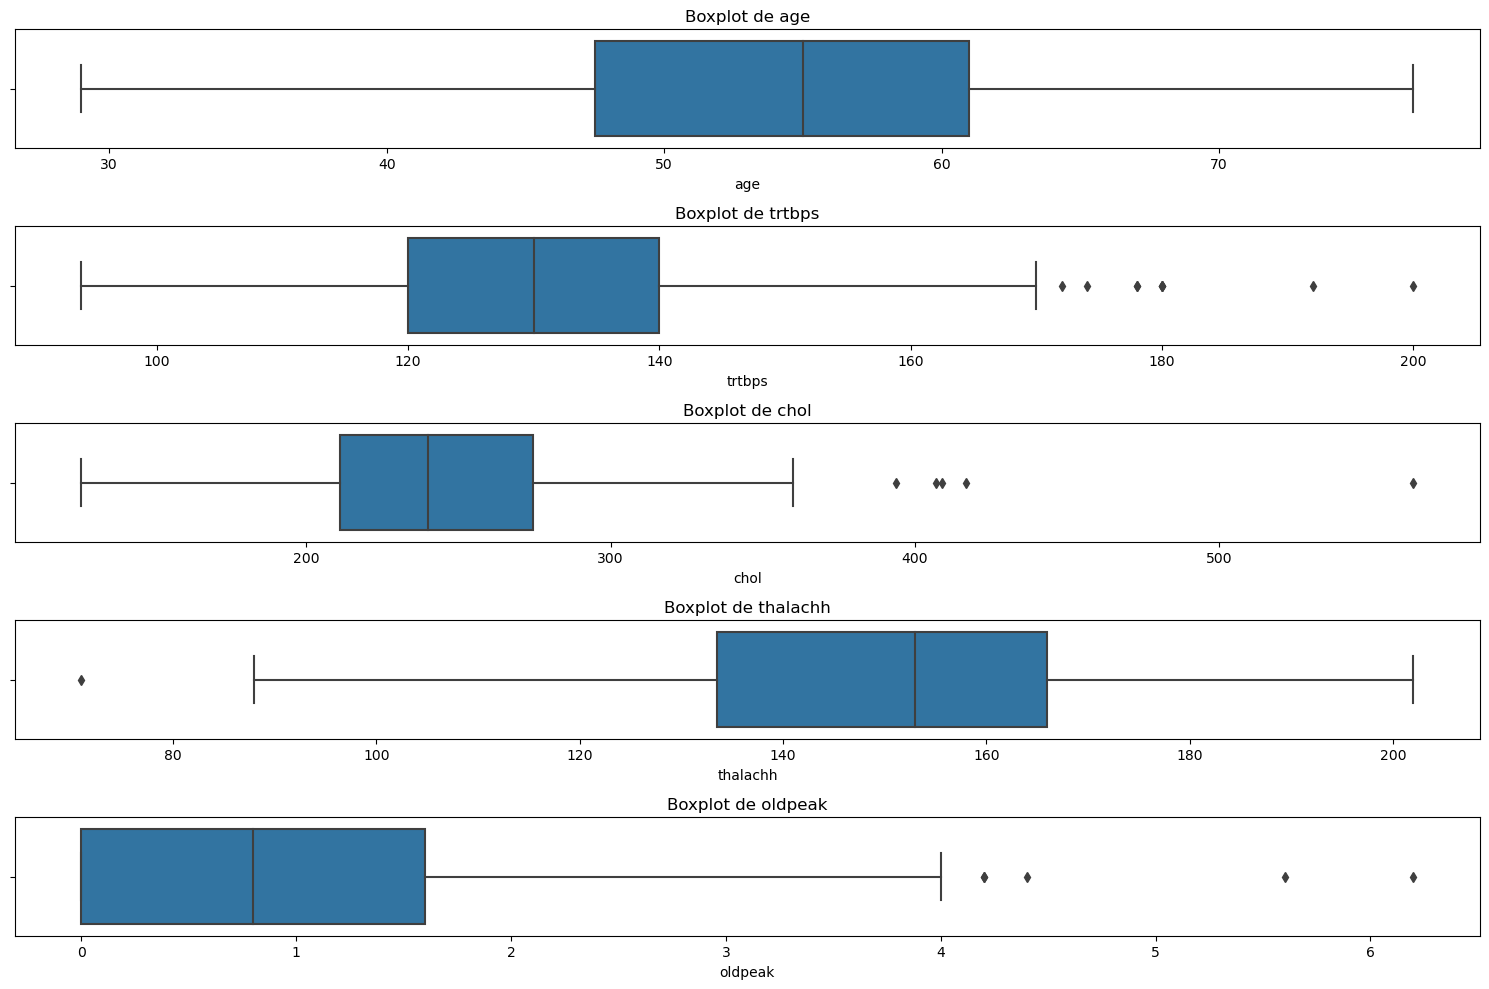

In [10]:
# Définir la taille de la figure pour les boxplots
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_variables, 1):
    plt.subplot(len(numerical_variables), 1, i)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

2)- Pour les variables catégoriques : 

In [11]:
# Obtenir la liste des colonnes catégorielles

categorical_variables = variable_info[variable_info['Type'] == 'categorical']['Variable']


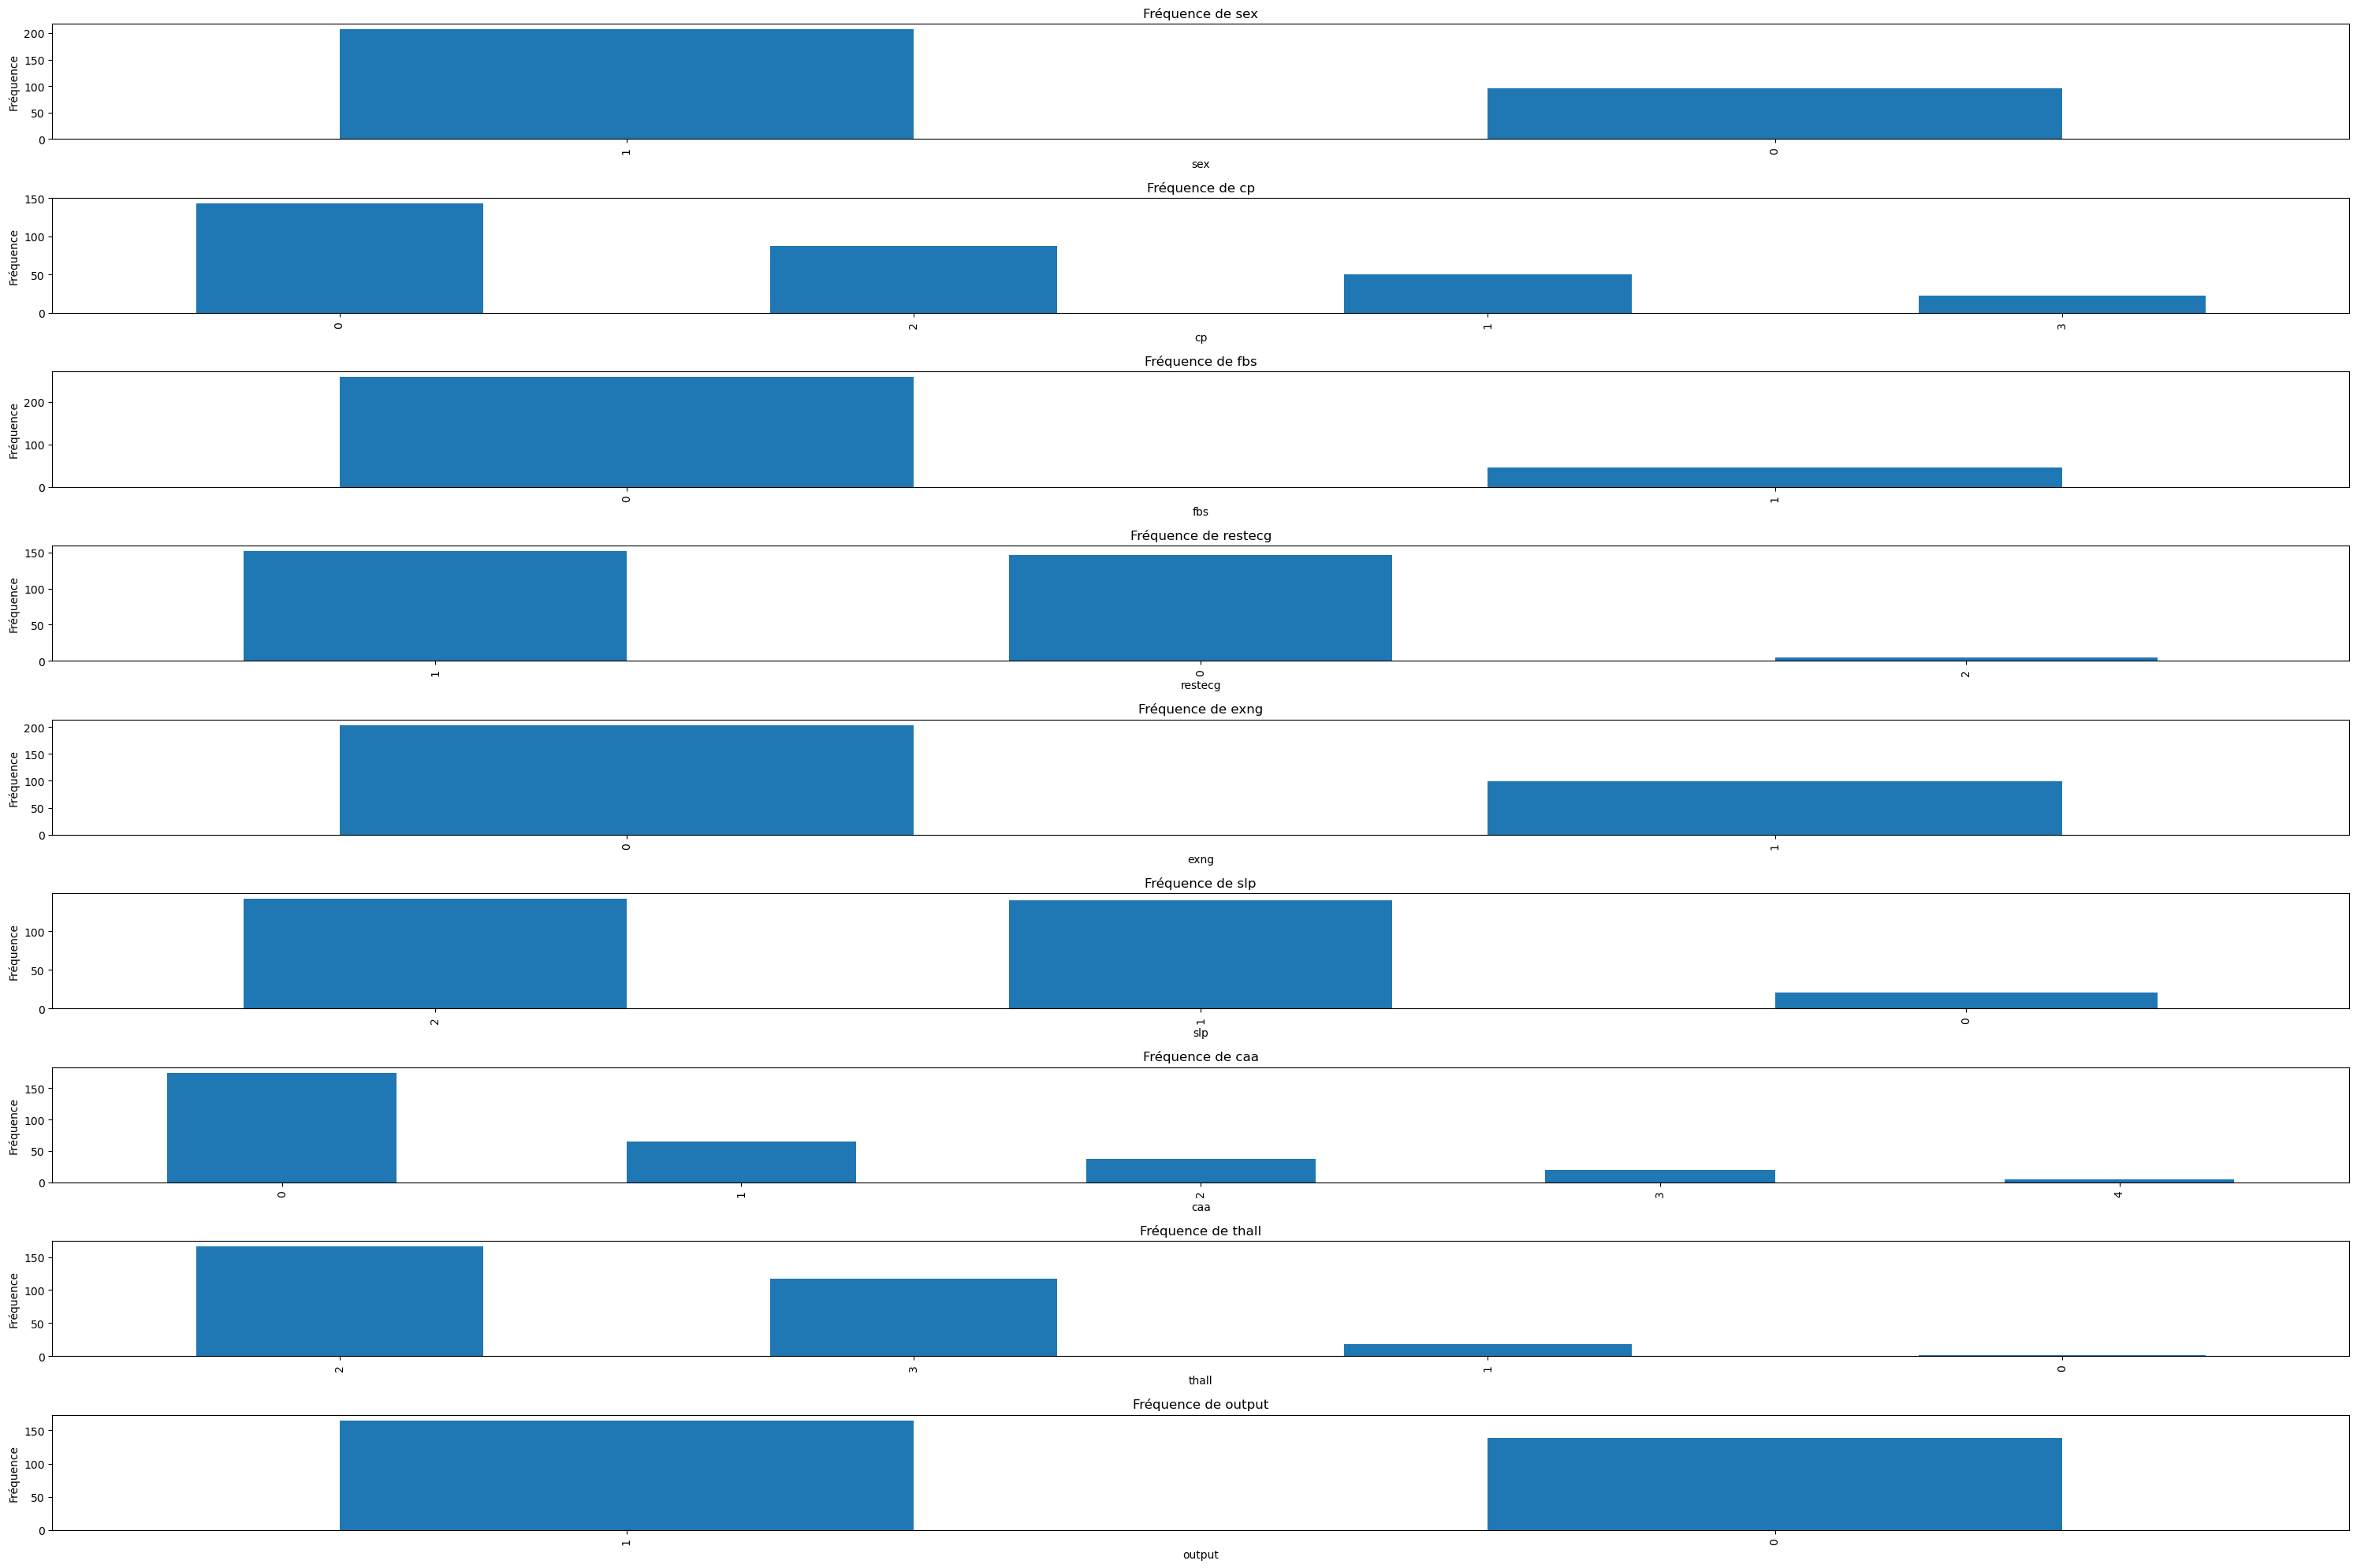

In [12]:
# Définir la taille de la figure
plt.figure(figsize=(30, 20))

# Itérer sur chaque variable catégorielle et créer un diagramme à barres
for i, column in enumerate(categorical_variables, 1):
    plt.subplot(len(categorical_variables), 1, i)
    data[column].value_counts().plot(kind='bar')
    plt.title(f'Fréquence de {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')

# Ajuster la disposition
plt.tight_layout()

# Afficher le graphique
plt.show()


**Analyse bi-variable:

1)-Continu et continu (matrice): Créer des nuages de points pour toutes les paires de variables continues

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight


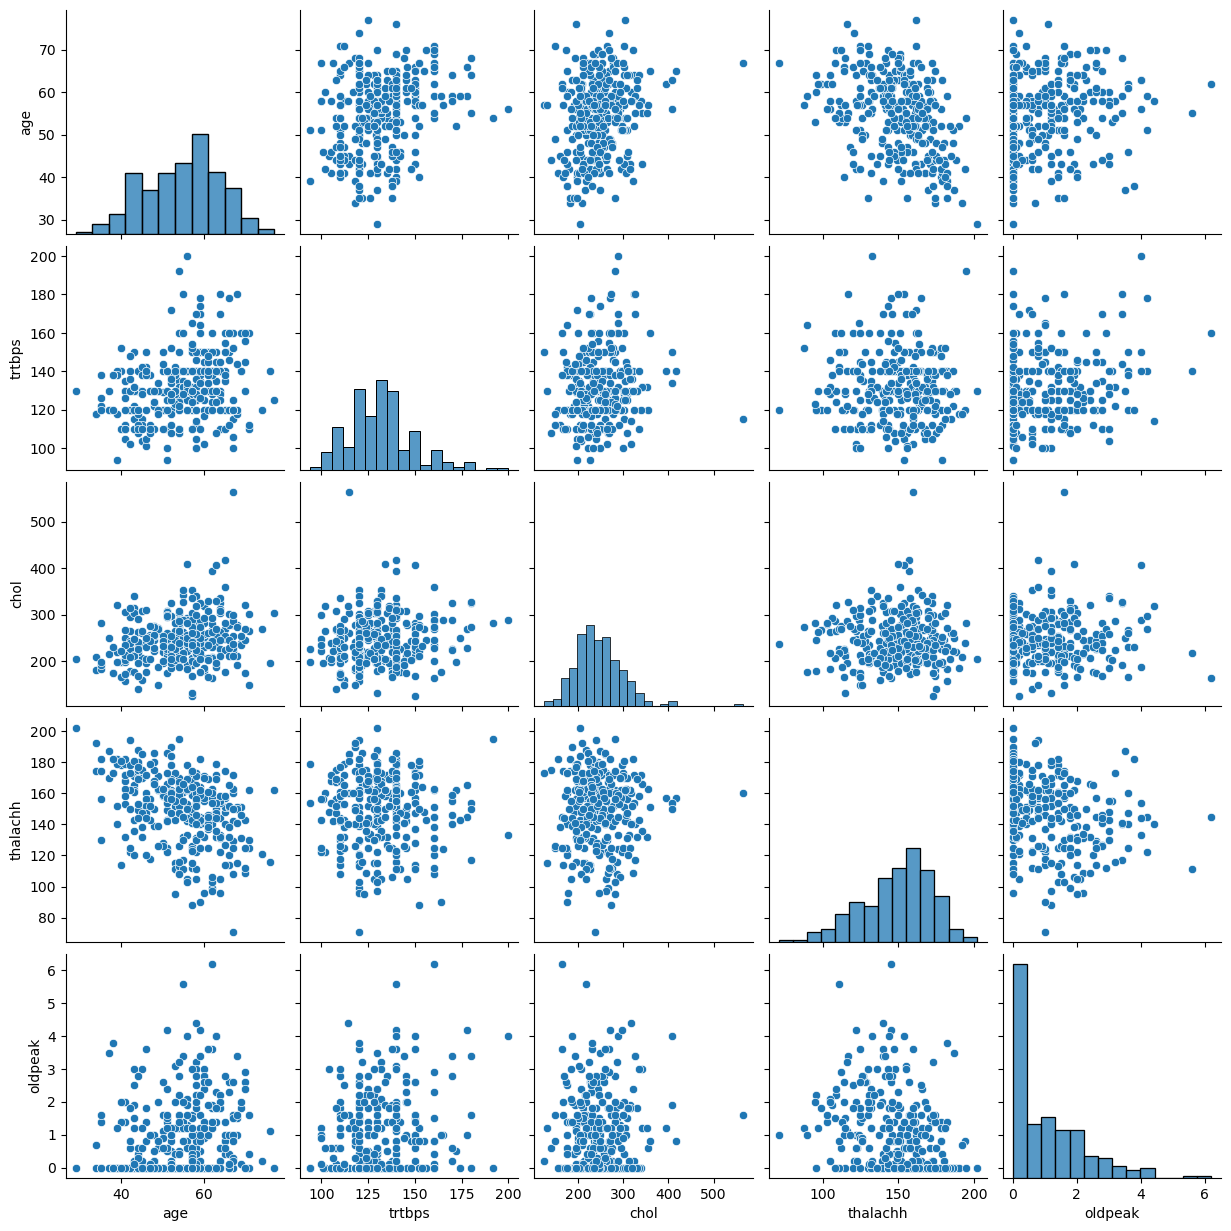

In [13]:
# Séparer les variables continues des variables catégorielles
continuous_variables = [col for col, type_ in column_types.items() if type_ == 'numerical']

# Créer des nuages de points pour chaque paire de variables continues
sns.pairplot(data[continuous_variables])

# Afficher les graphiques
plt.show()

2)- Catégorique et catégorique :créer un graphique en colonnes empilées

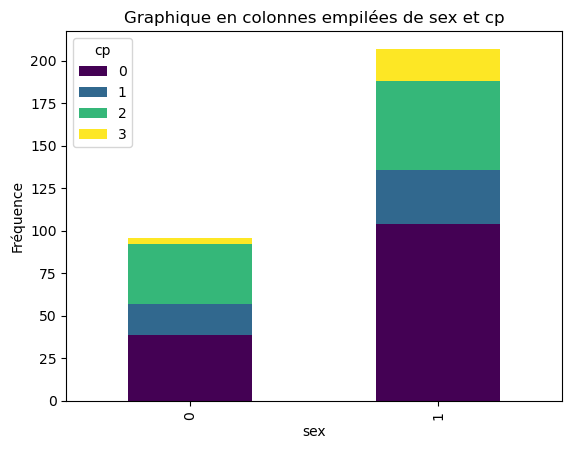

In [14]:
# Choisir deux variables catégorielles pour l'exemple
cat_var1 = 'sex'
cat_var2 = 'cp'

# Créer un tableau croisé des deux variables catégorielles
crosstab = pd.crosstab(data[cat_var1], data[cat_var2])

# Tracer le graphique en colonnes empilées
crosstab.plot(kind='bar', stacked=True, colormap='viridis')

# Ajouter des titres et des labels
plt.title(f'Graphique en colonnes empilées de {cat_var1} et {cat_var2}')
plt.xlabel(cat_var1)
plt.ylabel('Fréquence')
plt.legend(title=cat_var2)

# Afficher le graphique
plt.show()

3)- Catégorique et continu :Boxplots de construction combinés avec swarmplots.

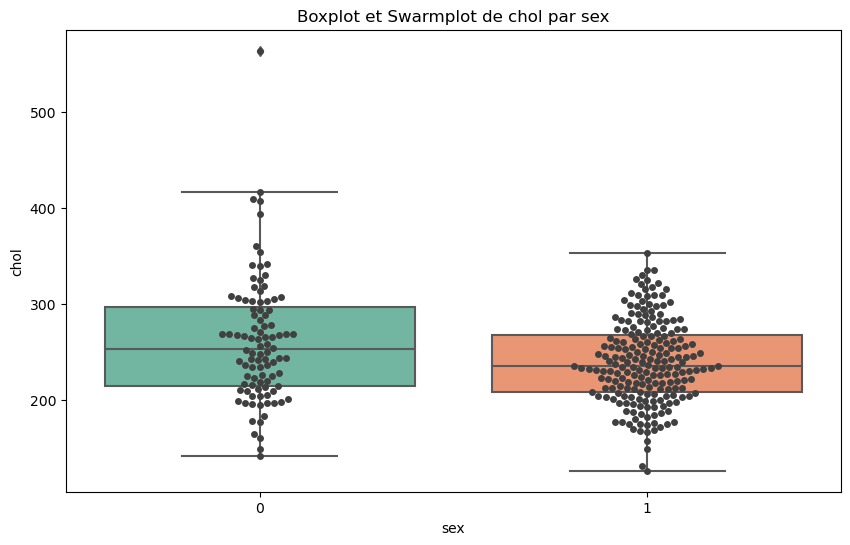

In [15]:
# Séparer les variables continues des variables catégorielles
categorical_variables = [col for col, type_ in column_types.items() if type_ == 'categorical']
numerical_variables = [col for col, type_ in column_types.items() if type_ == 'numerical']

# Choisir une variable catégorielle et une variable continue pour l'exemple
cat_var = 'sex'
num_var = 'chol'

# Créer la figure et les axes
plt.figure(figsize=(10, 6))

# Créer un boxplot pour la variable continue en fonction de la variable catégorielle
sns.boxplot(x=cat_var, y=num_var, data=data, palette="Set2")

# Ajouter un swarmplot pour afficher les points individuels
sns.swarmplot(x=cat_var, y=num_var, data=data, color=".25")

# Ajouter des titres et des labels
plt.title(f'Boxplot et Swarmplot de {num_var} par {cat_var}')
plt.xlabel(cat_var)
plt.ylabel(num_var)

# Afficher le graphique
plt.show()

**Pré-traitements : 

1)- Valeur manquante : Vérification des valeurs nulles dans les données à l’aide de la heatmap

<Axes: >

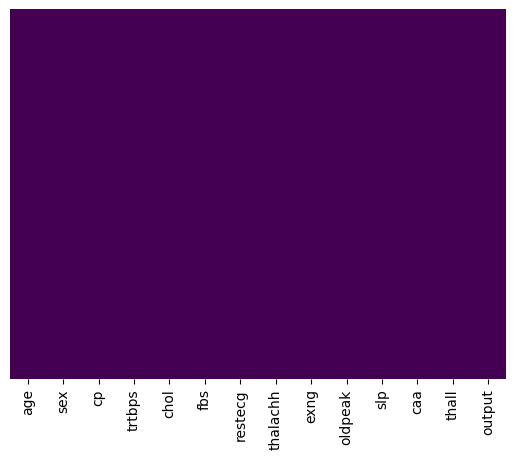

In [16]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
# Compter les valeurs manquantes par colonne
missing_values = data.isnull().sum()

print("Nombre de valeurs manquantes par colonne :")
print(missing_values)

Nombre de valeurs manquantes par colonne :
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


**Détection / Traitement des valeurs aberrantes : 

In [18]:
categorical_variables 

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [19]:
numerical_variables

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

1)- Visualisation des valeurs aberrantes

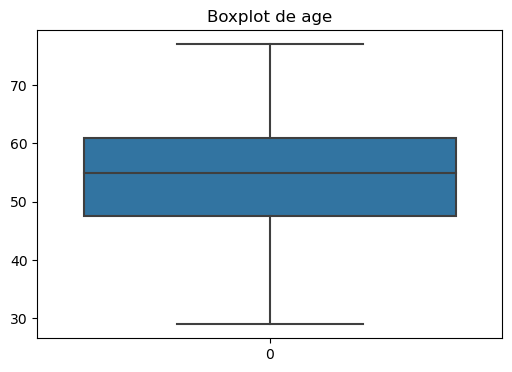

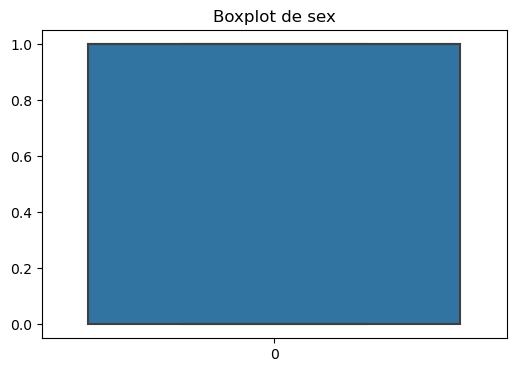

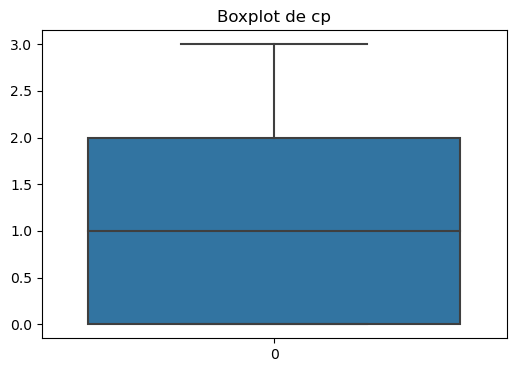

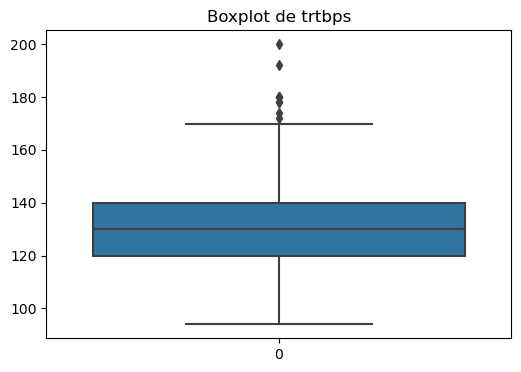

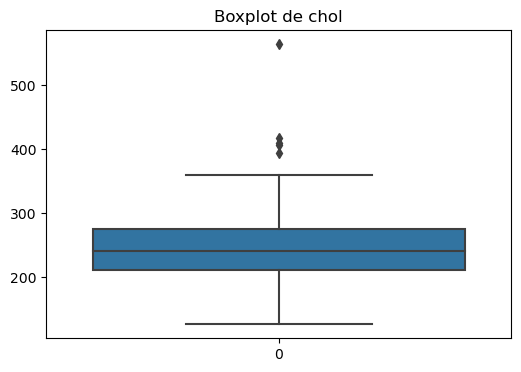

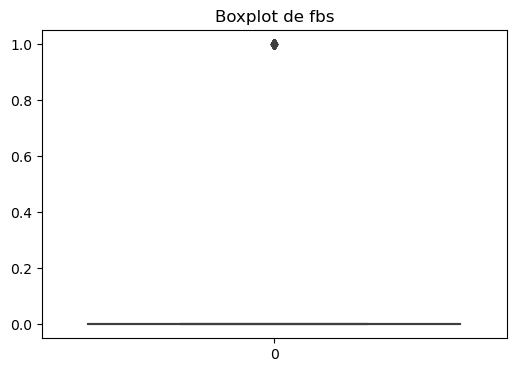

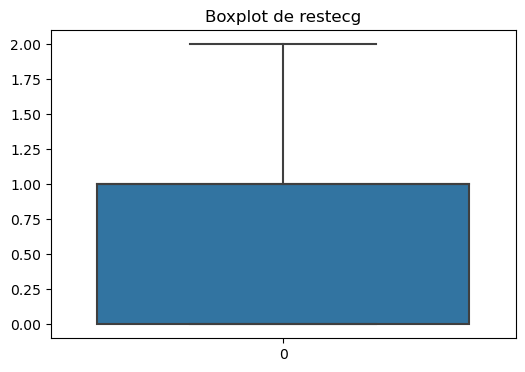

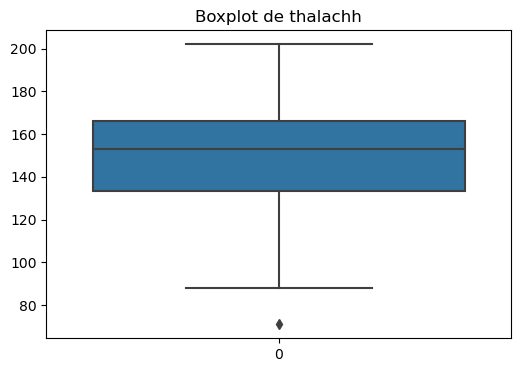

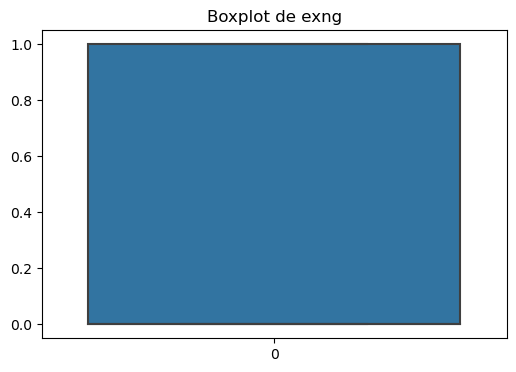

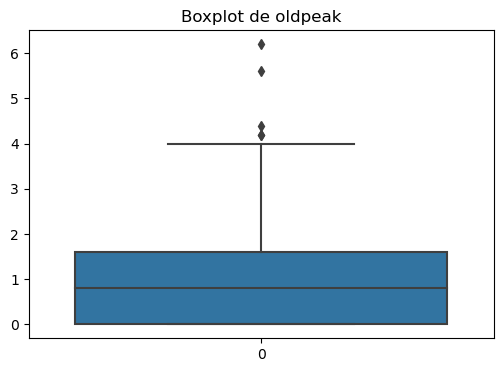

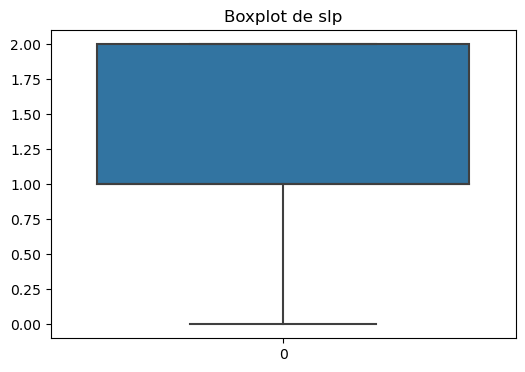

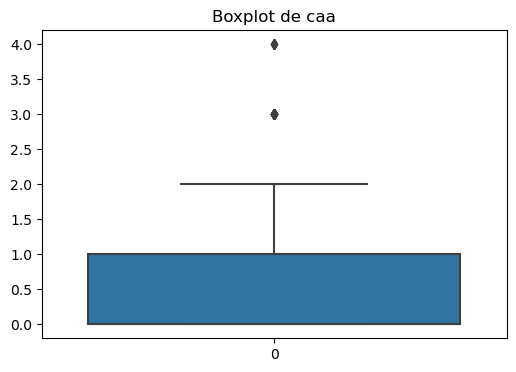

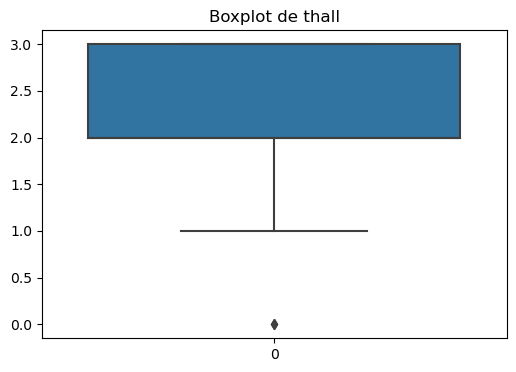

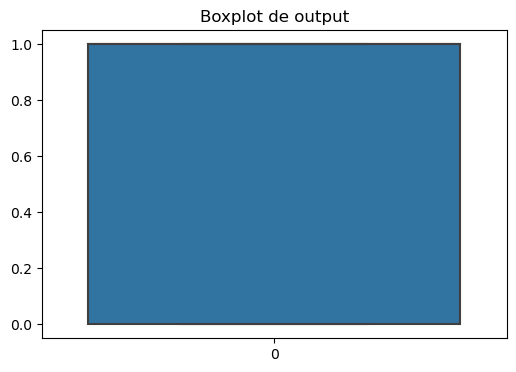

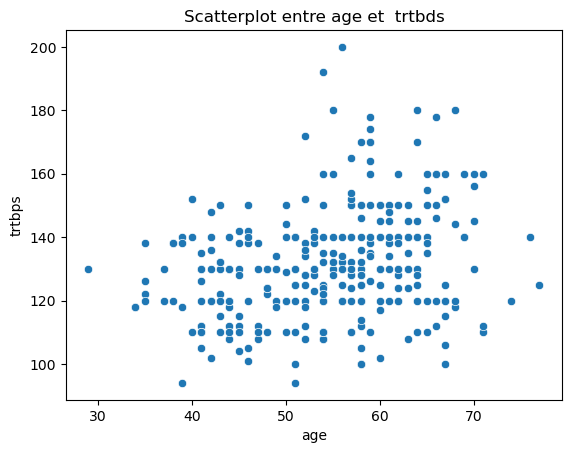

In [20]:
# Boxplots pour chaque colonne numérique
for column in data.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

# Scatterplot entre deux colonnes numériques

sns.scatterplot(data=data, x='age', y='trtbps')
plt.title('Scatterplot entre age et  trtbds')
plt.show()

2)- Comptage des valeurs aberrantes dans un ensemble de données utilisant l'IQR

In [6]:
# Supposons que train_data soit votre DataFrame et que features contienne les noms des caractéristiques
features = data.columns[:-1]

# Fonction pour compter les outliers en utilisant l'IQR
def count_outliers(df, features):
    outliers_count = {}
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        borne_inferieure = Q1 - 1.5 * IQR
        borne_superieure = Q3 + 1.5 * IQR
        outliers_count[feature] = len(df[(df[feature] < borne_inferieure) | (df[feature] > borne_superieure)])
    return outliers_count

# Compter les outliers
nombre_outliers_par_caracteristique = count_outliers(data, features)

# Afficher le nombre d'outliers pour chaque caractéristique
for feature, count in nombre_outliers_par_caracteristique.items():
    print(f"Caractéristique : {feature}, Nombre d'outliers : {count}")


Caractéristique : age, Nombre d'outliers : 0
Caractéristique : sex, Nombre d'outliers : 0
Caractéristique : cp, Nombre d'outliers : 0
Caractéristique : trtbps, Nombre d'outliers : 9
Caractéristique : chol, Nombre d'outliers : 5
Caractéristique : fbs, Nombre d'outliers : 45
Caractéristique : restecg, Nombre d'outliers : 0
Caractéristique : thalachh, Nombre d'outliers : 1
Caractéristique : exng, Nombre d'outliers : 0
Caractéristique : oldpeak, Nombre d'outliers : 5
Caractéristique : slp, Nombre d'outliers : 0
Caractéristique : caa, Nombre d'outliers : 25
Caractéristique : thall, Nombre d'outliers : 2


3)- Suppression des valeurs aberrantes à l’aide d’IQR

In [7]:
# Définir le multiplicateur pour le seuil de l'IQR
threshold_multiplier = 1.5

# Fonction pour gérer les outliers en utilisant l'IQR
def handle_outliers_iqr(data, threshold_multiplier):
    # Obtenir les colonnes/caractéristiques à traiter
    features = data.columns[:-1]
    
    # Itérer à travers chaque caractéristique
    for feature in features:
        # Calculer le premier quartile (Q1)
        Q1 = data[feature].quantile(0.25)
        # Calculer le troisième quartile (Q3)
        Q3 = data[feature].quantile(0.75)
        # Calculer l'IQR
        IQR = Q3 - Q1
        # Définir les bornes inférieure et supérieure
        borne_inferieure = Q1 - threshold_multiplier * IQR
        borne_superieure = Q3 + threshold_multiplier * IQR
        # Remplacer les outliers par les bornes
        data[feature] = np.where(data[feature] < borne_inferieure, borne_inferieure,
                                 np.where(data[feature] > borne_superieure, borne_superieure, data[feature]))
    return data

# Appliquer la fonction à votre jeu de données
data = handle_outliers_iqr(data, threshold_multiplier)


4)- Vérification de  suppression des valeurs aberrantes

In [8]:
features = data.columns[:-1]
# Compter les outliers
nombre_outliers_par_caracteristique = count_outliers(data, features)

# Afficher le nombre d'outliers pour chaque caractéristique
for feature, count in nombre_outliers_par_caracteristique.items():
    print(f"Caractéristique : {feature}, Nombre d'outliers : {count}")

Caractéristique : age, Nombre d'outliers : 0
Caractéristique : sex, Nombre d'outliers : 0
Caractéristique : cp, Nombre d'outliers : 0
Caractéristique : trtbps, Nombre d'outliers : 0
Caractéristique : chol, Nombre d'outliers : 0
Caractéristique : fbs, Nombre d'outliers : 0
Caractéristique : restecg, Nombre d'outliers : 0
Caractéristique : thalachh, Nombre d'outliers : 0
Caractéristique : exng, Nombre d'outliers : 0
Caractéristique : oldpeak, Nombre d'outliers : 0
Caractéristique : slp, Nombre d'outliers : 0
Caractéristique : caa, Nombre d'outliers : 0
Caractéristique : thall, Nombre d'outliers : 0


**Ingénierie des caractéristiques et construction de modèles :

1)- Division des données en variables explicatives et variable cible

In [9]:
# Définition de la colonne cible et séparation des caractéristiques
target_column = 'output'
X = data.drop(columns=[target_column])
y = data[target_column]


In [10]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [11]:
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63.0,1.0,3.0,145.0,233.0,0.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0


2)- Division des données en ensembles d'entraînement et de test

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


3)- Standardisation des donnéesà l’aide de StandardScaler

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


✨**II- Évaluer divers modèles d’apprentissage automatique

**Sélection du modèle :

Decision Tree Accuracy: 0.8197
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61

------------------------------------------------------------
KNeighbors Accuracy: 0.8525
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

------------------------------------------------------------
Support Vector Machine Accuracy: 0.8852
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1    

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.


Neural Network Accuracy: 0.8689
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

------------------------------------------------------------


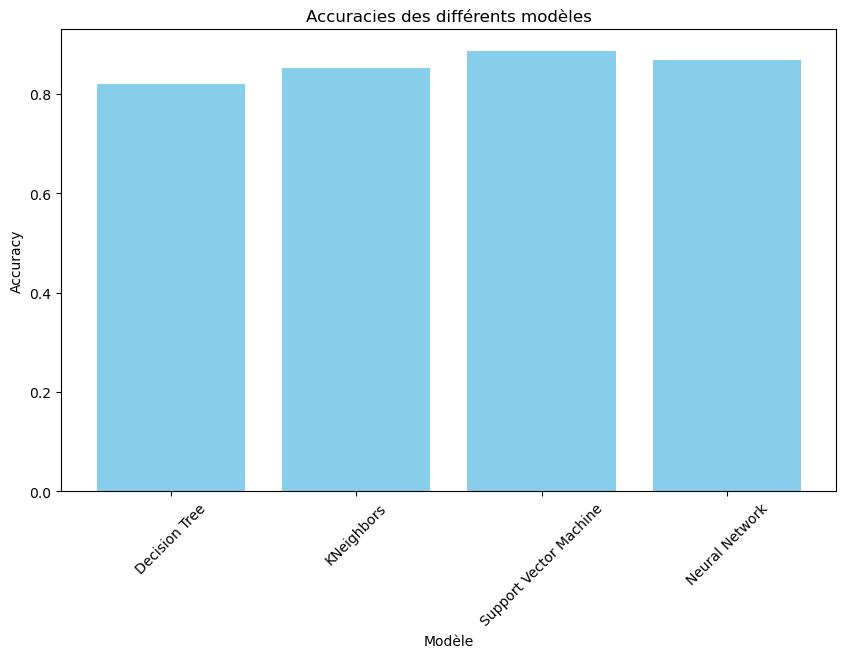

In [27]:
# Liste des modèles à évaluer
models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('KNeighbors', KNeighborsClassifier()),
    ('Support Vector Machine', SVC()),
    ('Neural Network', MLPClassifier(max_iter=300))
]

# Initialiser des listes pour stocker les noms de modèle et leurs accuracies correspondantes
model_names = []
accuracies = []

# Évaluation de chaque modèle
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # Ajouter le nom du modèle et son accuracy à leurs listes respectives
    model_names.append(name)
    accuracies.append(accuracy)
    print(f'{name} Accuracy: {accuracy:.4f}')
    print(classification_report(y_test, y_pred))
    print('-' * 60)

# Créer un graphique à barres pour afficher les accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Modèle')
plt.ylabel('Accuracy')
plt.title('Accuracies des différents modèles')
plt.xticks(rotation=45)
plt.show()


**Hyperparameter Tuning:

In [31]:
#Decision Tree
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [32]:
#Support Vector Machine
svc_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}


In [33]:
#Neural Network
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}


In [34]:
#K-Nearest Neighbors
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}


Fonctions de recherche de grille

In [35]:
def perform_grid_search(model, param_grid, model_name):
    print(f"Tuning hyperparameters for {model_name}...")
    
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"{model_name} Best Parameters: {best_params}")
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(report)

### Recherche de grille pour chaque modèle
# Decision Tree
perform_grid_search(DecisionTreeClassifier(), dt_param_grid, 'Decision Tree')

# Support Vector Machine
perform_grid_search(SVC(), svc_param_grid, 'Support Vector Machine')

# Neural Network
perform_grid_search(MLPClassifier(max_iter=300), mlp_param_grid, 'Neural Network')

# K-Nearest Neighbors
perform_grid_search(KNeighborsClassifier(), knn_param_grid, 'K-Nearest Neighbors')


Tuning hyperparameters for Decision Tree...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Decision Tree Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Decision Tree Accuracy: 0.8525
              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61

Tuning hyperparameters for Support Vector Machine...
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Support Vector Machine Best Parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Support Vector Machine Accuracy: 0.8689
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        3

**Cross-Validation:

Validation croisée et évaluation des performances des modèles de machine learning

In [23]:
# Définition des modèles avec leurs noms et instances
models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Support Vector Machine', SVC()),
    ('Neural Network', MLPClassifier(max_iter=300)),
    ('KNeighbors', KNeighborsClassifier())
]

# Définition de la validation croisée k-fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Métriques à évaluer
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Boucle sur chaque modèle
for name, model in models:
    print(f"Évaluation du modèle {name} avec la validation croisée k-fold :")
    for metric in metrics:
        # Évaluation du modèle avec validation croisée k-fold pour chaque métrique
        scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring=metric)
        print(f"{metric.capitalize()}: Mean={scores.mean():.4f}, Std={scores.std():.4f}")
    
    # Entraîner le modèle sur l'ensemble d'entraînement complet
    model.fit(X_train, y_train)
    
    # Prédictions sur l'ensemble de test
    y_pred = model.predict(X_test)
    
    # Calcul des métriques de performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Afficher les résultats des métriques de performance
    print("\nMétriques de performance sur l'ensemble de test :")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC-AUC:", roc_auc)
    print('-' * 60)


Évaluation du modèle Decision Tree avec la validation croisée k-fold :
Accuracy: Mean=0.7070, Std=0.0572
Precision: Mean=0.7639, Std=0.0915
Recall: Mean=0.7205, Std=0.1036
F1: Mean=0.7356, Std=0.0743
Roc_auc: Mean=0.7435, Std=0.0543

Métriques de performance sur l'ensemble de test :
Accuracy: 0.8360655737704918
Precision: 0.9230769230769231
Recall: 0.75
F1 Score: 0.8275862068965517
ROC-AUC: 0.8405172413793103
------------------------------------------------------------
Évaluation du modèle Support Vector Machine avec la validation croisée k-fold :
Accuracy: Mean=0.8017, Std=0.0380
Precision: Mean=0.8005, Std=0.0752
Recall: Mean=0.8475, Std=0.0626
F1: Mean=0.8201, Std=0.0487
Roc_auc: Mean=0.8744, Std=0.0186

Métriques de performance sur l'ensemble de test :
Accuracy: 0.8852459016393442
Precision: 0.8787878787878788
Recall: 0.90625
F1 Score: 0.8923076923076922
ROC-AUC: 0.8841594827586207
------------------------------------------------------------
Évaluation du modèle Neural Network avec

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: M

Accuracy: Mean=0.7768, Std=0.0356


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: M

Precision: Mean=0.7883, Std=0.0634


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: M

Recall: Mean=0.8252, Std=0.0990


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: M

F1: Mean=0.8075, Std=0.0409


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: M

Roc_auc: Mean=0.8809, Std=0.0223


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



Métriques de performance sur l'ensemble de test :
Accuracy: 0.8524590163934426
Precision: 0.8484848484848485
Recall: 0.875
F1 Score: 0.8615384615384615
ROC-AUC: 0.8512931034482758
------------------------------------------------------------
Évaluation du modèle KNeighbors avec la validation croisée k-fold :
Accuracy: Mean=0.8348, Std=0.0178
Precision: Mean=0.8197, Std=0.0525
Recall: Mean=0.8931, Std=0.0430
F1: Mean=0.8531, Std=0.0298
Roc_auc: Mean=0.8881, Std=0.0121

Métriques de performance sur l'ensemble de test :
Accuracy: 0.8524590163934426
Precision: 0.8709677419354839
Recall: 0.84375
F1 Score: 0.8571428571428571
ROC-AUC: 0.8529094827586207
------------------------------------------------------------


**Ensemble Methods:

In [17]:
# Modèle de base (Decision Tree)
base_model = DecisionTreeClassifier()

# Création du modèle de bagging avec Decision Tree comme base
bagging_model = BaggingClassifier(base_model, n_estimators=10, random_state=42)

# Entraînement du modèle sur l'ensemble d'entraînement
bagging_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_bagging = bagging_model.predict(X_test)

# Évaluation des performances du modèle
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging)
recall_bagging = recall_score(y_test, y_pred_bagging)
f1_bagging = f1_score(y_test, y_pred_bagging)
roc_auc_bagging = roc_auc_score(y_test, y_pred_bagging)

# Affichage des résultats
print("Bagging with Decision Tree:")
print("Accuracy:", accuracy_bagging)
print("Precision:", precision_bagging)
print("Recall:", recall_bagging)
print("F1 Score:", f1_bagging)
print("ROC-AUC:", roc_auc_bagging)



Bagging with Decision Tree:
Accuracy: 0.7540983606557377
Precision: 0.8148148148148148
Recall: 0.6875
F1 Score: 0.7457627118644067
ROC-AUC: 0.7575431034482759


In [21]:
# Création du modèle de boosting avec l'arbre de décision comme base
boosting_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Entraînement du modèle sur l'ensemble d'entraînement
boosting_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_boosting = boosting_model.predict(X_test)

# Évaluation des performances du modèle
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
precision_boosting = precision_score(y_test, y_pred_boosting)
recall_boosting = recall_score(y_test, y_pred_boosting)
f1_boosting = f1_score(y_test, y_pred_boosting)
roc_auc_boosting = roc_auc_score(y_test, y_pred_boosting)

# Affichage des résultats
print("Boosting with Decision Tree:")
print("Accuracy:", accuracy_boosting)
print("Precision:", precision_boosting)
print("Recall:", recall_boosting)
print("F1 Score:", f1_boosting)
print("ROC-AUC:", roc_auc_boosting)

Boosting with Decision Tree:
Accuracy: 0.8360655737704918
Precision: 0.8928571428571429
Recall: 0.78125
F1 Score: 0.8333333333333334
ROC-AUC: 0.8389008620689655


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


In [22]:
base_models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Support Vector Machine', SVC(probability=True)),
    ('Neural Network', MLPClassifier(max_iter=300)),
    ('KNeighbors', KNeighborsClassifier())
]

# Définition du méta-modèle
meta_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Création du modèle de stacking
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Entraînement du modèle sur l'ensemble d'entraînement
stacking_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_stacking = stacking_model.predict(X_test)

# Évaluation des performances du modèle
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
precision_stacking = precision_score(y_test, y_pred_stacking)
recall_stacking = recall_score(y_test, y_pred_stacking)
f1_stacking = f1_score(y_test, y_pred_stacking)
roc_auc_stacking = roc_auc_score(y_test, y_pred_stacking)

# Affichage des résultats
print("Stacking with Meta-model RandomForestClassifier:")
print("Accuracy:", accuracy_stacking)
print("Precision:", precision_stacking)
print("Recall:", recall_stacking)
print("F1 Score:", f1_stacking)
print("ROC-AUC:", roc_auc_stacking)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: M

Stacking with Meta-model RandomForestClassifier:
Accuracy: 0.8360655737704918
Precision: 0.8666666666666667
Recall: 0.8125
F1 Score: 0.8387096774193549
ROC-AUC: 0.8372844827586207
